In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Convert categorical variables to numeric representations and Handle missing values in 'Embarked' column

In [4]:
def convert_categorical_to_numeric(data):
    data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    return data

Calculate class probabilities and feature probabilities

In [5]:
def naive_bayes(x_train, y_train):
    classes = np.unique(y_train)
    class_probs = {}
    for class_label in classes:
        class_probs[class_label] = np.sum(y_train == class_label) / len(y_train)

    feature_probs = {}
    for feature_idx in range(x_train.shape[1]):
        feature_values = np.unique(x_train[:, feature_idx])
        feature_probs[feature_idx] = {}
        for class_label in classes:
            feature_probs[feature_idx][class_label] = {}
            for feature_value in feature_values:
                count = np.sum((x_train[:, feature_idx] == feature_value) & (y_train == class_label))
                prob = (count + 1) / (np.sum(y_train == class_label) + len(feature_values))
                feature_probs[feature_idx][class_label][feature_value] = prob
    
    return class_probs, feature_probs

def knn(x_train, y_train, x_test, k):
    predictions = []
    for i in range(x_test.shape[0]):
        distances = np.sqrt(np.sum((x_train - x_test[i])**2, axis=1))
        sorted_indices = np.argsort(distances)
        k_nearest_labels = y_train[sorted_indices[:k]]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)
    
    return np.array(predictions)

Load the training and testing datasets

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


Preprocess the data (remove unnecessary columns, handle missing values, etc.)

In [7]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Convert categorical variables to numeric representations

In [8]:
train_data = convert_categorical_to_numeric(train_data)
test_data = convert_categorical_to_numeric(test_data)

Separate features and target variable

In [9]:
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values
x_test = test_data.values

Apply any necessary preprocessing steps (e.g., imputation, normalization) to x_train, y_train, and x_test
Run Naive Bayes algorithm

In [10]:
class_probs, feature_probs = naive_bayes(x_train, y_train)

Run KNN algorithm and Choose the value of k for KNN

In [11]:
k = 5
predictions = knn(x_train, y_train, x_test, k)

Visualize the predictions

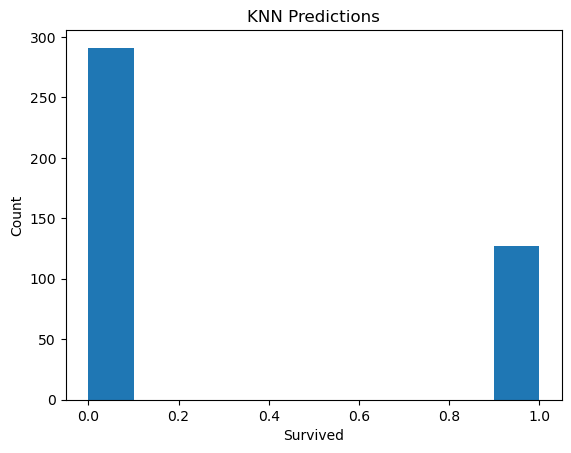

In [12]:
plt.hist(predictions)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('KNN Predictions')
plt.show()